In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

In [28]:
dataset = load_breast_cancer()

X = dataset.data

Y = dataset.target

In [29]:
cancerInput = pd.DataFrame(X)

cancerInput.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
cancerInput.shape

(569, 30)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

sc = StandardScaler()

Xsc_train = sc.fit_transform(X_train)
Xsc_test = sc.transform(X_test)

In [32]:
Xsc_train.shape

(455, 30)

In [33]:
model = GaussianNB()

model.fit(Xsc_train, y_train)

GaussianNB()

In [59]:
print(model)

expected = y_test
predicted = model.predict(Xsc_test)
probability = model.predict_proba(Xsc_test)[:,1]

print(metrics.classification_report(expected, predicted, digits=3))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
              precision    recall  f1-score   support

           0      0.875     0.894     0.884        47
           1      0.924     0.910     0.917        67

    accuracy                          0.904       114
   macro avg      0.900     0.902     0.901       114
weighted avg      0.904     0.904     0.904       114

[[42  5]
 [ 6 61]]


In [66]:
print('Accuracy:',accuracy_score(expected, predicted))
print('Precision:',metrics.precision_score(expected, predicted))
print('Recall:',metrics.recall_score(expected, predicted))

Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298


In [61]:
precision, recall, thresholds = precision_recall_curve(expected, probability)

Text(0.5, 1.0, 'Precision vs Recall')

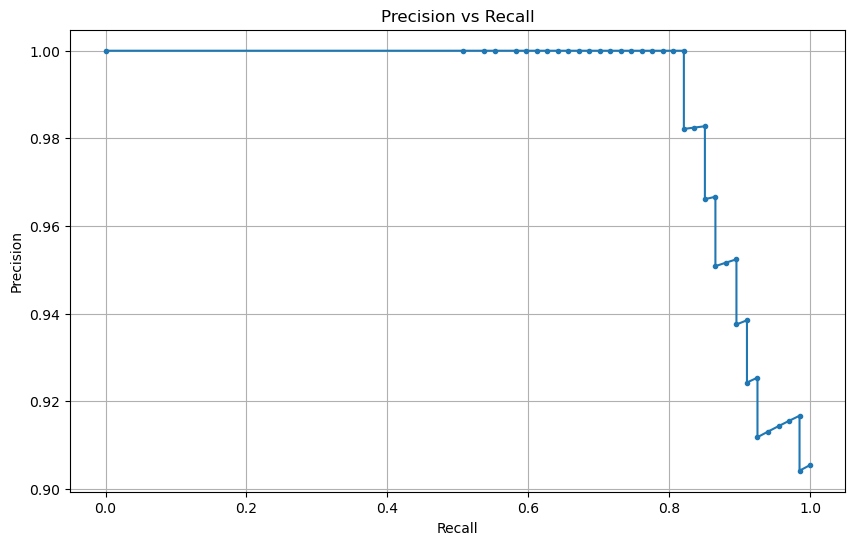

In [62]:
plt.plot(recall, precision, marker='.', label='Curve')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')